## Installing libraries

In [621]:
!pip install category_encoders

## Importing Libraries

In [622]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 


## Data reading

In [623]:
df = pd.read_csv('./data_houses/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [624]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


## Handling NaN

In [625]:
# cols are those features containing numeric data
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]
for col in cols:
    X[col].fillna(X[col].mean(), inplace=True)

## Converting string entries in some columns (ans also NaN in those columns)

In [626]:
ordinal_encoder = ce.OrdinalEncoder()
X_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X.select_dtypes(include=['object'])), columns=X.select_dtypes(include=['object']).columns)
X_final = pd.concat([X.drop(X.select_dtypes(include=['object']).columns, axis=1), X_encoded], axis=1)
X_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,1,1,1,1,4,5,5,1,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1,1,1,1,4,5,5,1,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,1,1,1,1,4,5,5,1,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,2,1,1,1,4,5,5,1,2
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,1,1,1,1,4,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,1,1,1,1,4,5,5,1,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,2,1,1,1,4,1,5,1,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,1,1,1,1,1,4,3,1,1,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,2,1,1,1,4,5,5,1,1


## Scaling data

In [627]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)
X_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.544044,-1.229033,-0.291494,-0.282982,-0.28142,0.063305,0.465764,0.19377,-0.292103,-0.394337
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.544044,-1.229033,-0.291494,-0.282982,-0.28142,0.063305,0.465764,0.19377,-0.292103,-0.394337
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.544044,-1.229033,-0.291494,-0.282982,-0.28142,0.063305,0.465764,0.19377,-0.292103,-0.394337
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,0.127956,-0.072855,-0.291494,-0.282982,-0.28142,0.063305,0.465764,0.19377,-0.292103,0.732340
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,-0.544044,-1.229033,-0.291494,-0.282982,-0.28142,0.063305,0.465764,0.19377,-0.292103,-0.394337


## Getting features which seems to be most important

In [628]:
top_features_idx = np.argsort(np.sum(kmeans.cluster_centers_, axis=0))[-10:]
top_features = X_scaled.columns[top_features_idx]
top_features

Index(['OverallQual', 'KitchenAbvGr', 'TotalBsmtSF', 'FullBath',
       'TotRmsAbvGrd', 'LotFrontage', '1stFlrSF', 'GrLivArea', '3SsnPorch',
       'PoolArea'],
      dtype='object')

In [629]:
X_selected = X_scaled[top_features]
X_selected

,OverallQual,KitchenAbvGr,TotalBsmtSF,FullBath,TotRmsAbvGrd,LotFrontage,1stFlrSF,GrLivArea,3SsnPorch,PoolArea
0,0.651479,-0.211454,-0.459303,0.789741,0.912210,-0.229372,-0.793434,0.370333,-0.116339,-0.068692
1,-0.071836,-0.211454,0.466465,0.789741,-0.318683,0.451936,0.257140,-0.482512,-0.116339,-0.068692
2,0.651479,-0.211454,-0.313369,0.789741,-0.318683,-0.093110,-0.627826,0.515013,-0.116339,-0.068692
3,0.651479,-0.211454,-0.687324,-1.026041,0.296763,-0.456474,-0.521734,0.383659,-0.116339,-0.068692
4,1.374795,-0.211454,0.199680,0.789741,1.527656,0.633618,-0.045611,1.299326,-0.116339,-0.068692
...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,-0.211454,-0.238122,0.789741,0.296763,-0.365633,-0.542435,0.250402,-0.116339,-0.068692
1456,-0.071836,-0.211454,1.104925,0.789741,0.296763,0.679039,2.355701,1.061367,-0.116339,-0.068692
1457,0.651479,-0.211454,0.215641,0.789741,1.527656,-0.183951,0.065656,1.569647,-0.116339,-0.068692
1458,-0.795151,-0.211454,0.046905,-1.026041,-0.934130,-0.093110,-0.218982,-0.832788,-0.116339,-0.068692


## Splitting data into training and testing

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Getting most suitable k from Silhouette Method (taken help online)

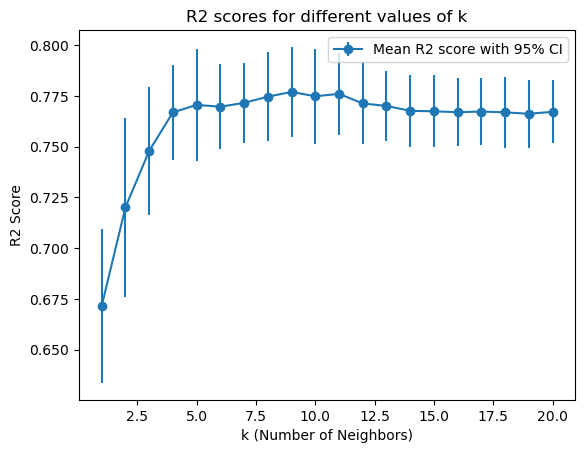

Best k: 9
Best R2 score: 0.7769273423619226


In [631]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

k_values = range(1, 21)

r2_scores_mean = []
r2_scores_std = []

best_k = None
best_r2 = -float('inf')

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    r2_scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='r2')
    
    avg_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)
    
    r2_scores_mean.append(avg_r2)
    r2_scores_std.append(std_r2)
    
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_k = k

plt.errorbar(k_values, r2_scores_mean, yerr=r2_scores_std, marker='o', label='Mean R2 score with 95% CI')
plt.title('R2 scores for different values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

print("Best k:", best_k)
print("Best R2 score:", best_r2)


## KNN Model

In [632]:
knn_model = KNeighborsRegressor(n_neighbors = 9)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [633]:
y_pred = knn_model.predict(X_test)
y_pred

array([147822.22222222, 317401.88888889, 126027.77777778, 177661.11111111,
       270967.33333333,  89427.77777778, 170105.55555556, 147044.44444444,
        89427.77777778, 113544.44444444, 184427.77777778, 116242.55555556,
       120194.44444444, 218407.77777778, 189127.77777778, 132577.77777778,
       193927.77777778, 141744.44444444, 137955.55555556, 213630.        ,
       186105.55555556, 197744.44444444, 169132.22222222, 131384.44444444,
       191563.33333333, 171710.        , 189547.11111111, 129750.        ,
       178287.22222222, 186211.11111111, 123388.88888889, 238787.77777778,
       339533.66666667, 104916.66666667, 257325.33333333, 151911.11111111,
       153411.11111111, 208711.11111111, 328947.44444444, 102377.77777778,
       117111.11111111, 225144.44444444, 124977.77777778, 341624.88888889,
       122166.66666667, 212743.33333333, 121488.88888889, 123344.44444444,
       369315.77777778, 138766.66666667, 117644.44444444, 194855.55555556,
       105488.88888889, 3

In [634]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1554430607.4642737


In [635]:
print(r2_score(y_test,y_pred))

0.7973449152647816


In [636]:
testing_df = pd.read_csv('./data_houses/test.csv')
testing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [637]:
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]
for col in cols:
    testing_df[col].fillna(testing_df[col].mean(), inplace=True)
    
    
ordinal_encoder = ce.OrdinalEncoder()
X_encoded = pd.DataFrame(ordinal_encoder.fit_transform(testing_df.select_dtypes(include=['object'])), columns=testing_df.select_dtypes(include=['object']).columns)
X_final = pd.concat([testing_df.drop(testing_df.select_dtypes(include=['object']).columns, axis=1), X_encoded], axis=1)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)

X_selected = X_scaled[top_features]

In [638]:
y_pred = knn_model.predict(X_selected)
y_pred

array([134533.33333333, 159472.22222222, 158377.77777778, ...,
       175266.66666667, 121811.11111111, 227711.11111111])

### Getting final predictions

In [639]:
result = pd.DataFrame(y_pred, columns=['SalePrice'])

In [640]:
result.to_csv("./result.csv")